<a href="https://colab.research.google.com/github/Romasha-Guin/Final-Year-Project/blob/main/Working_with_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle


In [6]:
# Set seaborn theme
sns.set_theme(style="white", palette=None)

# Get the default color palette from matplotlib
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Create a cycle iterator for colors from the default color palette
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [7]:
# Get a list of audio files using glob
audio_files = glob('/content/Sample-0.mp3')

In [8]:
# Display the first audio file using IPython Audio
ipd.Audio(audio_files[0])

In [9]:
# Load the audio file using librosa
y, sr = librosa.load(audio_files[0])

In [10]:
# Print some information about the audio file
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 1.1943455e-05 -1.2605096e-04  6.0029561e-06 -8.2944141e-05
 -1.5525392e-04  3.2915268e-06 -1.7629180e-05  6.6839741e-05
 -1.0402646e-04 -3.9383187e-05]
shape y: (221440,)
sr: 22050


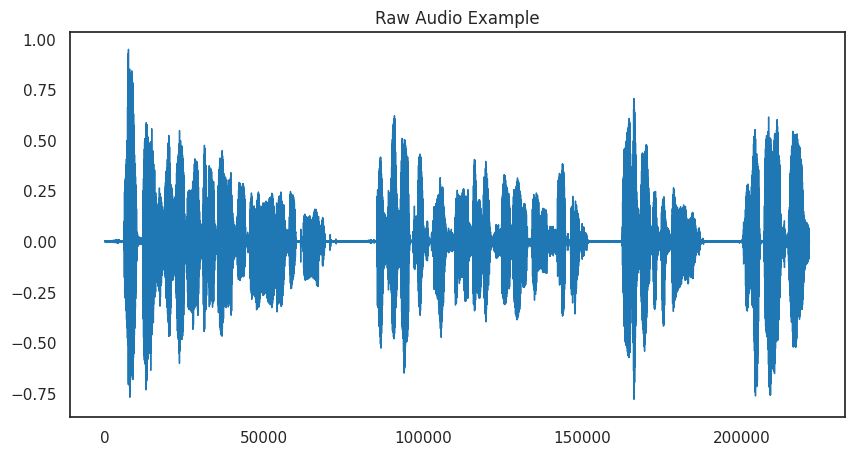

In [11]:
# Plot the raw audio signal using pandas and matplotlib
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                  color=color_pal[0])

# Show the plot
plt.show()

In [12]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

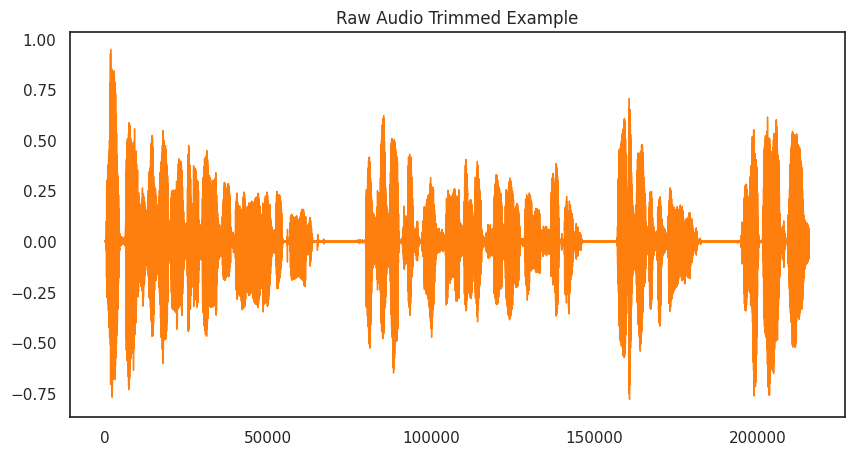

In [13]:
# Plot the raw audio signal after trimming
pd.Series(y_trimmed).plot(figsize=(10, 5),
                          lw=1,
                          title='Raw Audio Trimmed Example',
                          color=color_pal[1])
plt.show()

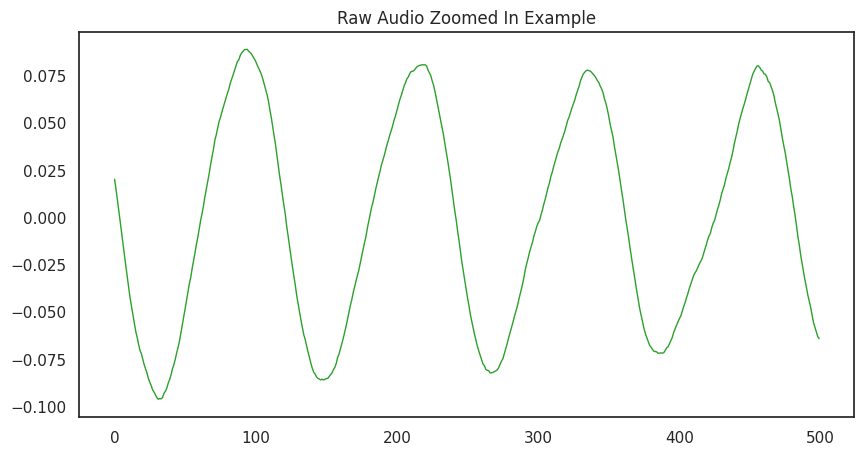

In [14]:
# Plot a zoomed-in example of the raw audio signal
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                                lw=1,
                                title='Raw Audio Zoomed In Example',
                                color=color_pal[2])
plt.show()

In [15]:
# Compute the Short-Time Fourier Transform (STFT) and convert to dB scale
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [16]:
# Display the shape of the resulting spectrogram
print(S_db.shape)

(1025, 433)


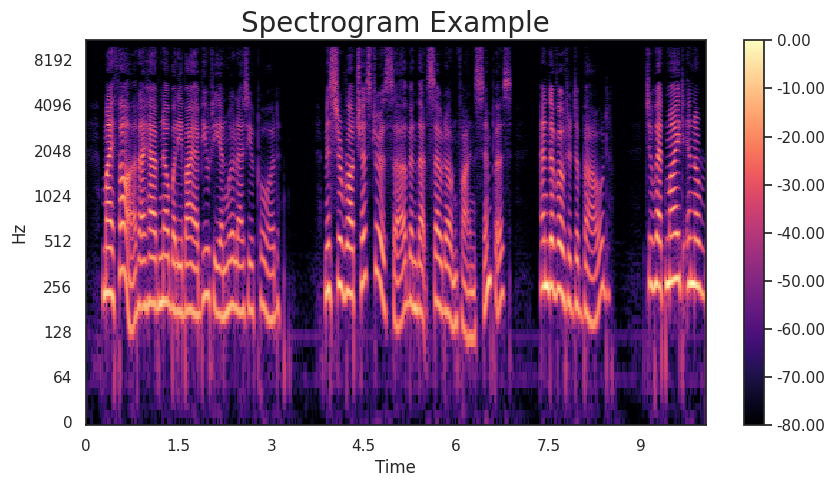

In [17]:
# Plot the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

In [18]:
# Compute the Mel spectrogram and convert to dB scale
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

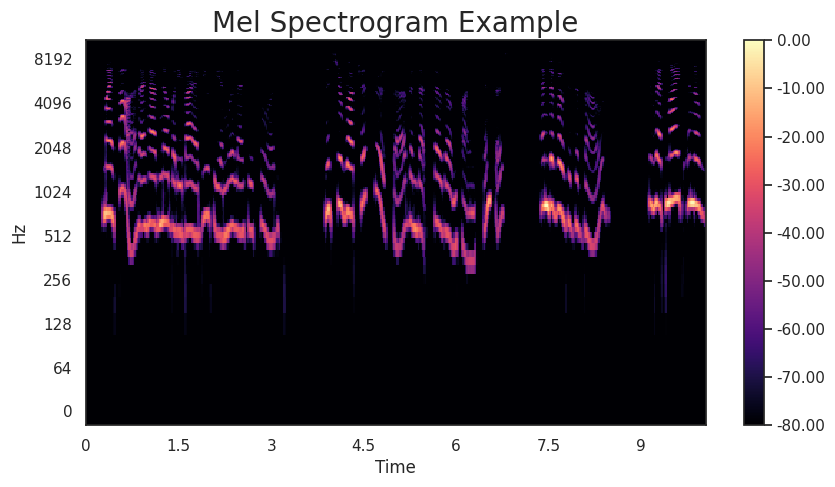

In [19]:
# Plot the Mel spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title('Mel Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()